In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the datasets
dataset1 = pd.read_csv('dataset.csv', encoding='latin1')


In [6]:
# Identify rows where 'Curing Period (days)' is greater than 28
age_above_28 = dataset1['Curing Period (days)'] > 28
dataset1.loc[age_above_28, 'Curing Period (days)'] = dataset1.loc[age_above_28, 'Curing Period (days)'].apply(lambda x: 28 if x > 28 else x) 

In [7]:
# Display the first few rows of the dataset to understand its structure
print(dataset1.head())

   ï»¿Cement (kg in a m^3 mixture)  Blast Furnace Slag (kg in a m^3 mixture)  \
0                            540.0                                       0.0   
1                            540.0                                       0.0   
2                            332.5                                     142.5   
3                            332.5                                     142.5   
4                            198.6                                     132.4   

   Fly Ash (kg in a m^3 mixture)  Water (kg/mÂ³)  \
0                            0.0           162.0   
1                            0.0           162.0   
2                            0.0           228.0   
3                            0.0           228.0   
4                            0.0           192.0   

   Superplasticizer(kg in a m^3 mixture)  Coarse Aggregate (kg/mÂ³)  \
0                                    2.5                     1040.0   
1                                    2.5                     105

In [8]:
# Drop any duplicate rows
dataset1 = dataset1.drop_duplicates()

In [9]:
# Check for missing values
missing_values = dataset1.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 ï»¿Cement (kg in a m^3 mixture)             0
Blast Furnace Slag (kg in a m^3 mixture)    0
Fly Ash (kg in a m^3 mixture)               0
Water (kg/mÂ³)                              0
Superplasticizer(kg in a m^3 mixture)       0
Coarse Aggregate (kg/mÂ³)                   0
Sand (Fine Aggregate) (kg/mÂ³)              0
Curing Period (days)                        0
Compressive Strength (MPa)                  0
dtype: int64


In [10]:
# Drop rows with missing values
dataset1_cleaned = dataset1.dropna()

c:\Users\dania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


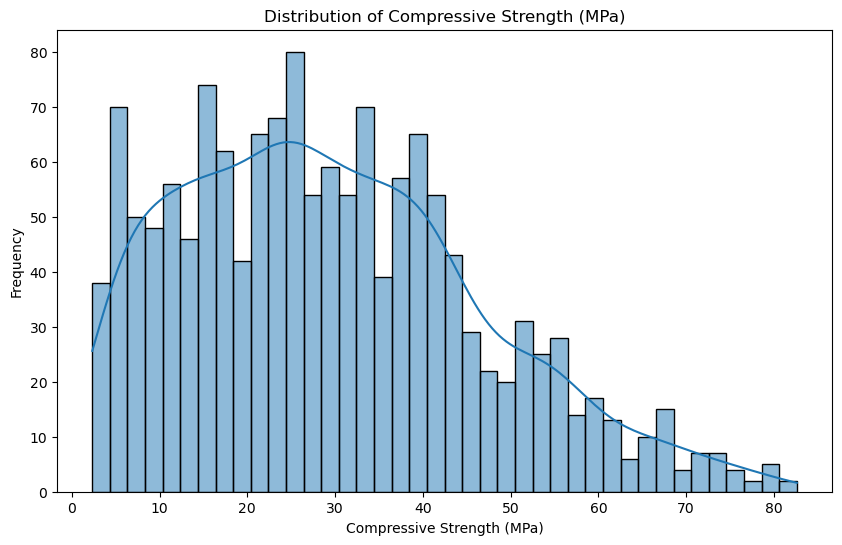

In [11]:
# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(dataset1['Compressive Strength (MPa)'], bins=40, kde=True)
plt.title('Distribution of Compressive Strength (MPa)')
plt.xlabel('Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

In [15]:
selected_features = ['ï»¿Cement (kg in a m^3 mixture)',
       'Blast Furnace Slag (kg in a m^3 mixture)',
       'Fly Ash (kg in a m^3 mixture)', 'Water (kg/mÂ³)',
       'Superplasticizer(kg in a m^3 mixture)', 'Coarse Aggregate (kg/mÂ³)',
       'Sand (Fine Aggregate) (kg/mÂ³)', 'Curing Period (days)',
       'Compressive Strength (MPa)']



In [16]:
dataset1.columns

Index(['ï»¿Cement (kg in a m^3 mixture)',
       'Blast Furnace Slag (kg in a m^3 mixture)',
       'Fly Ash (kg in a m^3 mixture)', 'Water (kg/mÂ³)',
       'Superplasticizer(kg in a m^3 mixture)', 'Coarse Aggregate (kg/mÂ³)',
       'Sand (Fine Aggregate) (kg/mÂ³)', 'Curing Period (days)',
       'Compressive Strength (MPa)'],
      dtype='object')

c:\Users\dania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

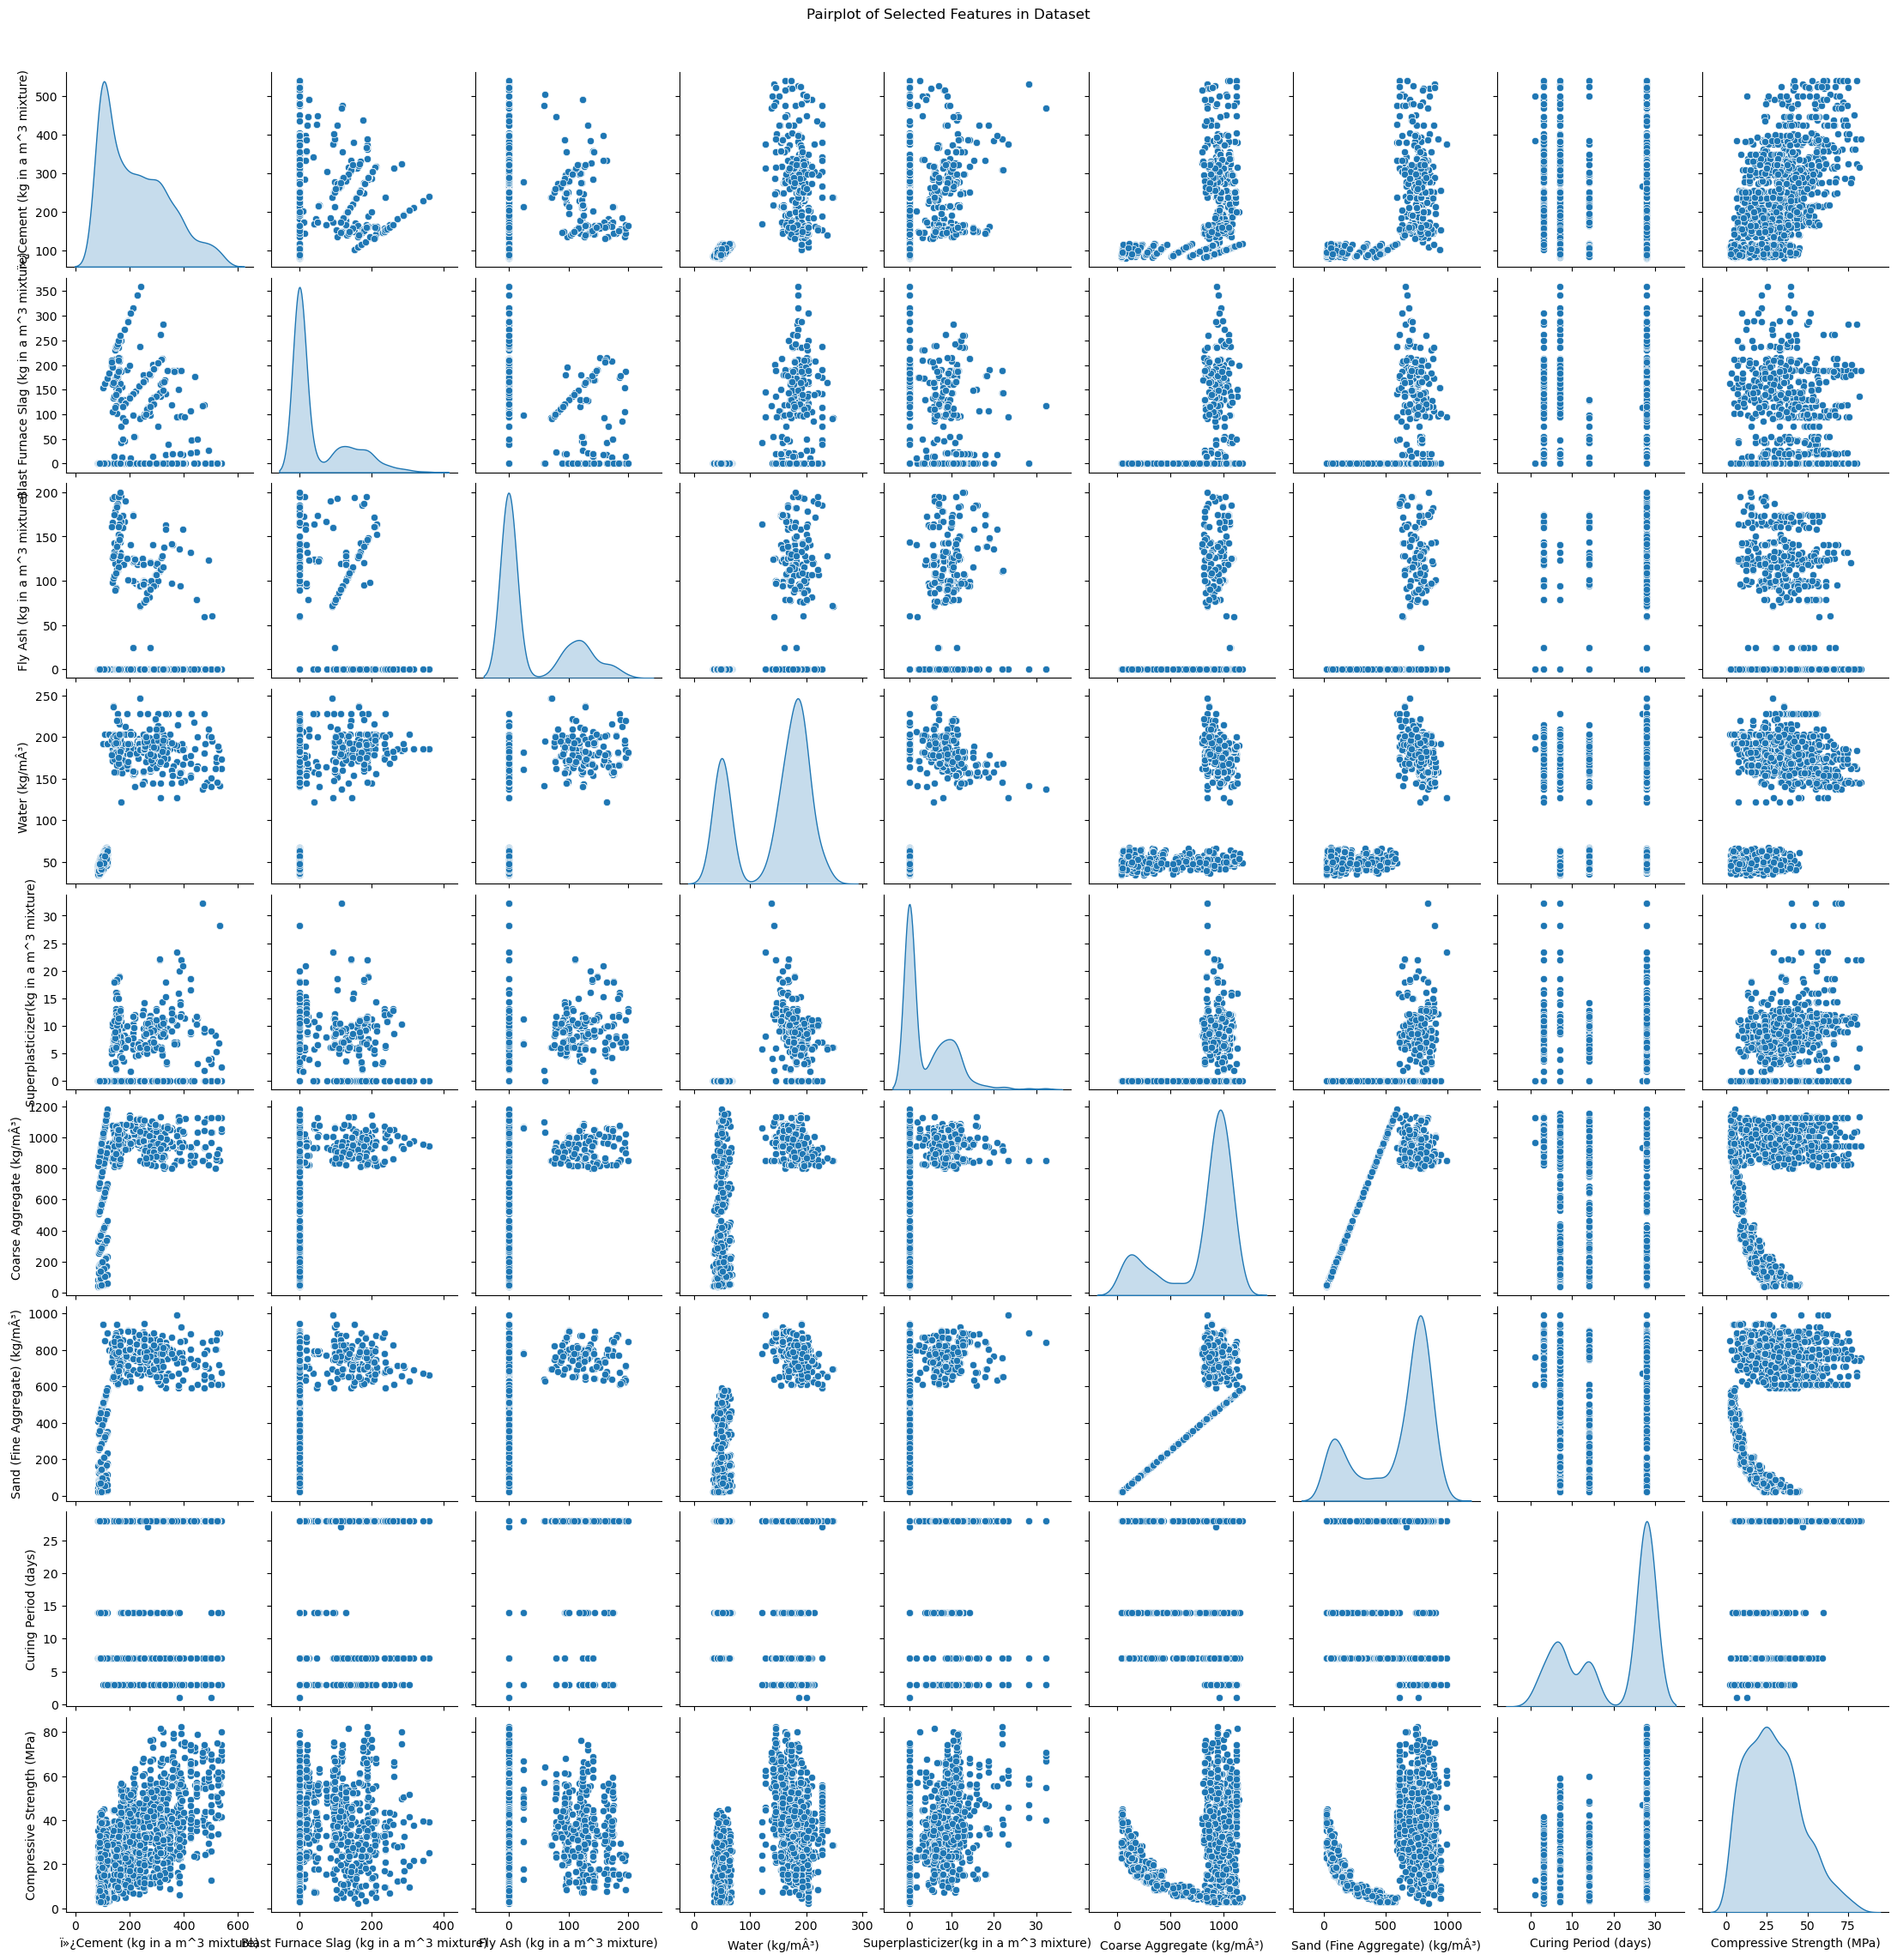

In [17]:
# Plot pairplot for the combined dataset using the adjusted selected features
sns.pairplot(dataset1[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features in Dataset', y=1.02)
plt.show()

In [18]:
# Update the target column to match the exact column name
target_column = 'Compressive Strength (MPa)'

In [19]:
# Select features and target variable
X = dataset1[selected_features]
y = dataset1[target_column]

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Hyperparameter tuning and model evaluation using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\dania\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [25]:
# Cross-validation for better performance evaluation
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores.mean()}')


c:\Users\dania\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\dania\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\dania\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

Cross-Validation R² Scores: 0.9999315844117869


In [26]:
# Training the model with the best parameters
best_rf.fit(X_train_scaled, y_train)


c:\Users\dania\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

In [49]:
# Save the trained model and scaler for later use
joblib.dump(best_rf, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [50]:
# Predictions
y_train_pred = best_rf.predict(X_train_scaled)
y_test_pred = best_rf.predict(X_test_scaled)


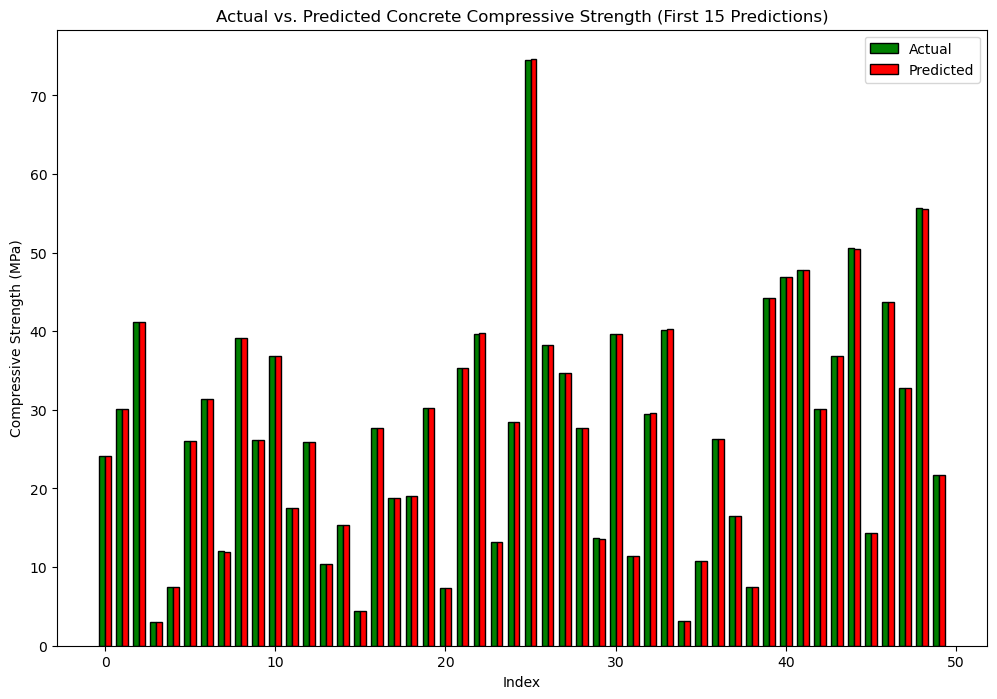

In [66]:
# Select the first 15 entries for visualization
num_entries = 50
indices = np.arange(num_entries)

# Get the first 15 actual and predicted values
y_test_subset = y_test.head(num_entries).values
y_test_pred_subset = y_test_pred[:num_entries]

# Set the width of the bars
bar_width = 0.35

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(indices - bar_width / 2, y_test_subset, bar_width, label='Actual', color='green', edgecolor='k')
plt.bar(indices + bar_width / 2, y_test_pred_subset, bar_width, label='Predicted', color='red', edgecolor='k')
plt.xlabel('Index')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Concrete Compressive Strength (First 15 Predictions)')
plt.legend()
plt.show()



In [61]:
import pandas as pd

# Select the first 15 entries for visualization
num_entries = 15
y_test_subset = y_test.head(num_entries).reset_index(drop=True)
y_test_pred_subset = y_test_pred[:num_entries]

# Create a DataFrame to show actual vs. predicted values
results_df = pd.DataFrame({
    'Index': np.arange(num_entries),
    'Actual': y_test_subset.values,
    'Predicted': y_test_pred_subset
})

# Display the DataFrame
print(results_df)

# Optional: To display in a more interactive way if using Jupyter Notebook
import IPython.display as display
display.display(results_df)


    Index     Actual  Predicted
0       0  24.131660  24.105673
1       1  30.089537  30.114511
2       2  41.203086  41.171193
3       3   3.063663   3.028913
4       4   7.429894   7.421958
5       5  26.062193  26.051563
6       6  31.350474  31.359078
7       7  12.001818  11.971768
8       8  39.198973  39.185783
9       9  26.144930  26.143636
10     10  36.819256  36.864931
11     11  17.540269  17.540143
12     12  25.896731  25.948690
13     13  10.335935  10.356063
14     14  15.416683  15.408095


,Index,Actual,Predicted
0,0,24.131660,24.105673
1,1,30.089537,30.114511
2,2,41.203086,41.171193
3,3,3.063663,3.028913
4,4,7.429894,7.421958
5,5,26.062193,26.051563
6,6,31.350474,31.359078
7,7,12.001818,11.971768
8,8,39.198973,39.185783
9,9,26.144930,26.143636


In [52]:
# Metrics
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [53]:
# Print training results
print(f"Training RMSE: {train_rmse:.4f}, Training R²: {train_r2:.4f}")

Training RMSE: 0.0647, Training R²: 1.0000


In [54]:
# Print testing results
print(f"Testing RMSE: {test_rmse:.4f}, Testing R²: {test_r2:.4f}")

print(f"Model trained successfully with R^2: {test_r2:.4%} and RMSE: {test_rmse:.4f}")

Testing RMSE: 0.0625, Testing R²: 1.0000
Model trained successfully with R^2: 99.9985% and RMSE: 0.0625


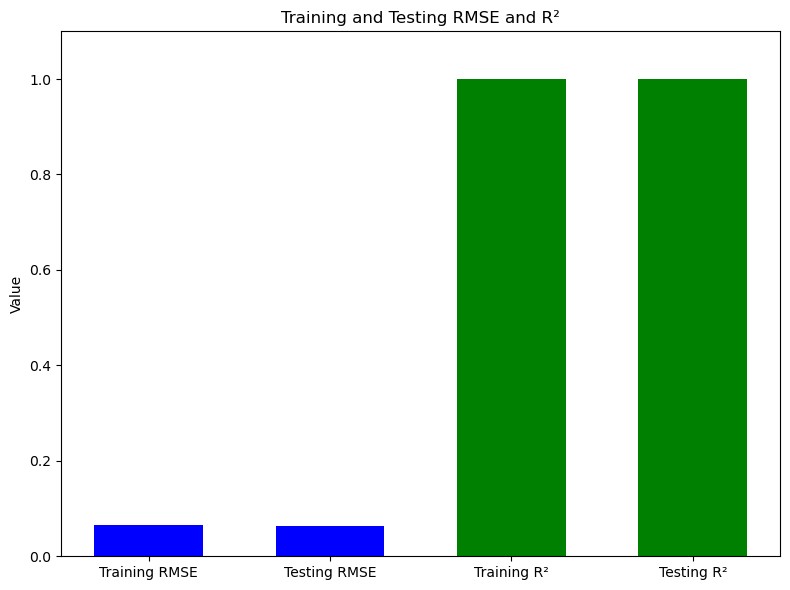

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for RMSE and R² for both training and testing
metrics = ['Training RMSE', 'Testing RMSE', 'Training R²', 'Testing R²']
values = [0.0647, 0.0625, 1.0000, 1.0000]

# Creating a bar plot for both RMSE and R² values
plt.figure(figsize=(8, 6))

# Plot the bars
plt.bar(metrics, values, color=['blue', 'blue', 'green', 'green'], width=0.6)

# Adding labels and title
plt.ylabel('Value')
plt.title('Training and Testing RMSE and R²')

# Setting a limit for the y-axis
plt.ylim(0, 1.1)

# Display the plot
plt.tight_layout()
plt.show()
